# Exploring Means of Transport Sales Data

### By Oluwasola Aduewa

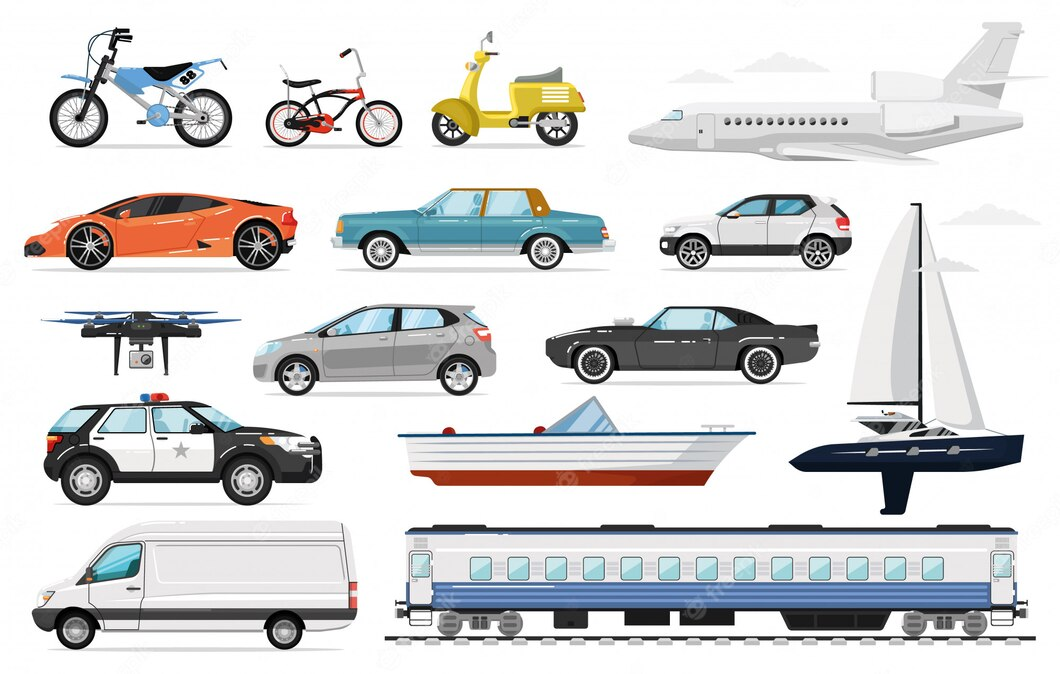

# Table of Content
***
- #### [Introduction](#intro)
- #### [Importing Libaries](#lib)
- #### [Data Wrangling](#wrang)
- #### [Assessing the Data](#assess)
- #### [Data Cleaning](#clean)
- #### [Exploratory Data Analysis](#xplore)
    - #### [Univariate Exploration](#uni)
    - #### [Bivariate Exploration](#bi)
    - #### [Multivariate Exploration](#mul)
- #### [Conclussion](#con)
- #### [Limitations](#lim)



# Introduction <a id="intro"><a/>
***
The one crucially important factor to the successes of any organization is sales. After all, increasing the number of sales is the goal that every company strive to achieve. They have to optimize sales by finding weak spots and bottlenecks in sales processess which is an integral part of sales analysis.

The Means of Transport Sales data- was partly collected from kaggle and modified personally to suit the kind of exploratory analysis. The sales rep data, containing imaginary Sales Reps working for the organization that owns the original data is the only additional dataset that was merged with it. This note book was created  with the intention to reinforce learning on how to sytematically squeeze insights out of data.
    
The goal of this exploration is to uncover insights into sales performace and identify areas for improvements

# Importing Libaries <a id="lib"></a>
***
Python 3.0 is being used for this analysis. Just before we dive into the analysis, it is very important to import the neccessaary libaries which include: **Pandas**, **Numpy**,**Seaborn** and **Matplolib**. These libaries are sufficient for the work ahead

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Data wrangling <a id="wrang"></a>
***
The journey starts by importing the datasets into pandas. **NB:** The datasets have been downloaded locally for offline accessibility

In [2]:
df=pd.read_excel(io='sales_rep.xlsx',sheet_name='sales_data_sample')
df2=pd.read_excel(io='sales_rep.xlsx',sheet_name='Sales_rep',)

In [3]:
# Run quick summary about the dataframes
df.info()
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   PRODUCTLINE      2823 non-null   object 
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   object 
 10  CUSTOMERNAME     2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  POSTALCODE       2747 non-null   object 
 13  COUNTRY          2823 non-null   object 
 14  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 330.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeInde

## Initial Data Structure
>- The main dataframe comprise 2,823 rows and 15 features. There are 5 numeric variables, 3 categorical variables and the rest are are norminal (mere labels)
>- The DEALSIZE and the PRODUCTLINE are ordered factor variables (Small->Medium->Large), (Motorcycle -> Vintage Cars -> Classic cars -> Buses and Trucks, -> Plaines ->Trains, -> Ships)
>- The second dataframe comprise 20 rows and  6 columns. However, the feature of interest in this dataset is the SALE_REP_ID and Name
## Features of Interest
- **QUANTITY ORDERED**: The defines the quantity of orders by customers (numeric)
- **PRICEEACH:** Defines the price of each product 
- **ORDERLINENUMBER:** This is the line ID that correspond to SALE_REP_ID
- **SALES:** The actual sale of
- **ORDERDATE:** The Actual date the sales was initiated
- **PRODUCTLINE:** The category of means of transportation
- **CUSTOMERNAME:** The name of the customer
- **CITY:** The city the customer resides
- **COUNTRY:** where the customer live
- **DEALSIZE:** Bulk of goods
- **SALE_REP_ID:** This is the id that correspond to line ID
- **Name:** Is the name of the Sales Rep

Up Next: Examine sample of the records

# Assessing the Data <a id="assess"></a>
***
The goal of this work is to practise exploratory analysis. Even though exploratory analysis is an iterative process it is vitally important to inspect the datasets for tidiness and data quality issues.

Find out if there are duplicate records in the datasets

In [4]:
print("The number of duplicated rows in dataframe 1 is",df.duplicated().sum())
print("The number of duplicated rows in dataframe 2 is",df2.duplicated().sum())

The number of duplicated rows in dataframe 1 is 0
The number of duplicated rows in dataframe 2 is 0


In [5]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium
1,10309,41,100.00,5,4394.38,10/15/2004 0:00,Shipped,Motorcycles,95,S10_1678,Baane Mini Imports,Stavern,4110,Norway,Medium
2,10318,46,94.74,1,4358.04,2004-02-11 00:00:00,Shipped,Motorcycles,95,S10_1678,Diecast Classics Inc.,Allentown,70267,USA,Medium
3,10174,34,100.00,4,8014.82,2003-06-11 00:00:00,Shipped,Classic Cars,214,S10_1949,"Australian Gift Network, Co",South Brisbane,4101,Australia,Large
4,10194,42,100.00,11,7290.36,11/25/2003 0:00,Shipped,Classic Cars,214,S10_1949,"Saveley & Henriot, Co.",Lyon,69004,France,Large


In [6]:
df2.head(5)

,SALES_REP_ID,Name,First Name,Last Name,Gender,Photo Img
0,1,Harmani Calderoni,Harmani,Calderoni,M,https://images.pexels.com/photos/91227/pexels-...
1,2,Singleton Ashton,Singleton,Ashton,M,https://images.pexels.com/photos/718261/pexels...
2,3,Craig Hunt,Craig,Hunt,F,https://images.pexels.com/photos/4342352/pexel...
3,4,Ayden Bowen,Ayden,Bowen,M,https://images.pexels.com/photos/3778603/pexel...
4,5,Bailey Aspen,Bailey,Aspen,M,https://images.pexels.com/photos/2294492/pexel...


# Summary of Data Assessment
>- dataframe 1 will be merged with dataframe 2 through an inner join on SALE_REP_ID and ORDERLINENUMBER
>- Convert ODERDATE from string to type datetime
>- Feature engineering: Create a column for the cost of goods. This achieved by multiplying the price each of the product by the quantity ordered

# Data Cleaning <a id="clean"></a>
***

### A: Merge the two Dataframes

In [7]:
df=df.iloc[:,0:].merge(df2.iloc[:,:2],left_on='ORDERLINENUMBER',right_on='SALES_REP_ID')

In [8]:
# Examine the newly created  dataframe
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE,SALES_REP_ID,Name
0,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium,1,Harmani Calderoni
1,10318,46,94.74,1,4358.04,2004-02-11 00:00:00,Shipped,Motorcycles,95,S10_1678,Diecast Classics Inc.,Allentown,70267,USA,Medium,1,Harmani Calderoni
2,10210,34,100.00,1,6123.40,2004-12-01 00:00:00,Shipped,Motorcycles,193,S10_4698,Osaka Souveniers Co.,Osaka,530-0003,Japan,Medium,1,Harmani Calderoni
3,10377,50,100.00,1,5182.00,2005-09-02 00:00:00,Shipped,Classic Cars,115,S12_4675,"Toys of Finland, Co.",Helsinki,21240,Finland,Medium,1,Harmani Calderoni
4,10419,37,100.00,1,5202.94,5/17/2005 0:00,Shipped,Classic Cars,124,S18_1589,Salzburg Collectables,Salzburg,5020,Austria,Medium,1,Harmani Calderoni
5,10405,55,100.00,1,8289.05,4/14/2005 0:00,Shipped,Classic Cars,169,S18_3232,Mini Caravy,Strasbourg,67000,France,Large,1,Harmani Calderoni
6,10392,36,100.00,1,4035.96,2005-10-03 00:00:00,Shipped,Vintage Cars,99,S18_3320,Mini Auto Werke,Graz,8010,Austria,Medium,1,Harmani Calderoni
7,10240,37,100.00,1,5959.22,4/13/2004 0:00,Shipped,Classic Cars,141,S18_3685,Osaka Souveniers Co.,Osaka,530-0003,Japan,Medium,1,Harmani Calderoni
8,10105,50,79.67,1,3983.50,2003-11-02 00:00:00,Shipped,Vintage Cars,83,S24_3816,Danish Wholesale Imports,Kobenhavn,1734,Denmark,Medium,1,Harmani Calderoni
9,10317,35,83.32,1,2916.20,2004-02-11 00:00:00,Shipped,Planes,72,S24_4278,Technics Stores Inc.,Burlingame,94217,USA,Small,1,Harmani Calderoni


### B: Rename the column names to snake_case for easy of data manipulations


In [9]:
x=[x.lower() for x in df.columns ]

In [10]:
# paste and edit output x
x=['order_number',
 'quantity_ordered',
 'price_each',
 'order_line_number',
 'sales',
 'order_date',
 'status',
 'product_line',
 'msrp',
 'product_code',
 'customer_name',
 'city',
 'postal_code',
 'country',
 'deal_size',
 'sales_rep_id',
 'name']
# replace data frame's columns with x
df.columns=x

### C: Covert order_line_number to string and Remove the Unwanted Columns

In [11]:
df.order_number=df.order_number.astype(str)
df.order_line_number=df.order_line_number.astype(str)
df.drop(['sales_rep_id','msrp'],axis=1,inplace=True)

### D: Convert order_date to datetime

In [12]:
df['order_date']=pd.to_datetime(df['order_date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       2823 non-null   object        
 1   quantity_ordered   2823 non-null   int64         
 2   price_each         2823 non-null   float64       
 3   order_line_number  2823 non-null   object        
 4   sales              2823 non-null   float64       
 5   order_date         2823 non-null   datetime64[ns]
 6   status             2823 non-null   object        
 7   product_line       2823 non-null   object        
 8   product_code       2823 non-null   object        
 9   customer_name      2823 non-null   object        
 10  city               2823 non-null   object        
 11  postal_code        2747 non-null   object        
 12  country            2823 non-null   object        
 13  deal_size          2823 non-null   object        
 14  name    

Finally, the working dataframe is 2823 records and 18 columns

## Exploratory Data Analysis<a id="xplore"></a>
***
The exploration will start from building univariate through bivariate, then to multivariate visuaizations. This is aimed at systematically exploring the data

In order to build an intuition about the dataset, a quick descriptive summary of the numeric variables will provide a good start into the analysis proper

In [14]:
df.describe()

,quantity_ordered,price_each,sales
count,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072
std,9.741443,20.174277,1841.865106
min,6.000000,26.880000,482.130000
25%,27.000000,68.860000,2203.430000
50%,35.000000,95.700000,3184.800000
75%,43.000000,100.000000,4508.000000
max,97.000000,100.000000,14082.800000


### (I) Univariate Exploration <a id="uni"></a>
***
The key variable in this dataset is the sales.

## What is the distribution of sales made throughout the period given?

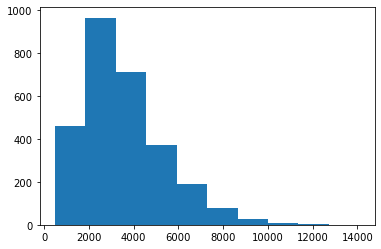

In [15]:

plt.hist(data=df, x='sales');
#plt.axvline(x = df.describe().iloc[1, 3], color = 'red')
#plt.axvline(x = df.describe().iloc[5, 3], color = 'green')
plt.show()

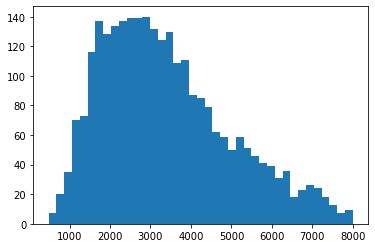

In [16]:
plt.hist(data=df, x='sales',bins=np.linspace(482, 8000, 40))
plt.show()

The skwness of the sales distribution is  1.16


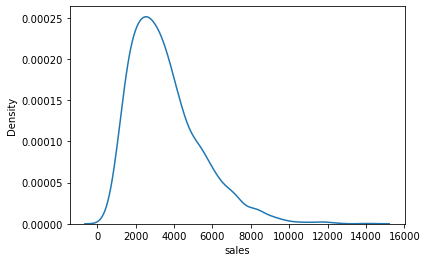

In [17]:
sns.kdeplot(data=df.sales)
print('The skwness of the sales distribution is ',round(df.sales.skew(),2))

>- The distribution of the sales data is right skewed due to the presence of far more expensive goods in the mix.
>- The second plot shows a unimodal distribution with the peak around 3000 dollars
>- Third plot display vividly the right skewness of the sales distribution


## What is the distribution of the quantity of goods ordered by customers?

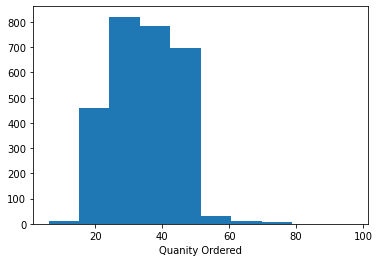

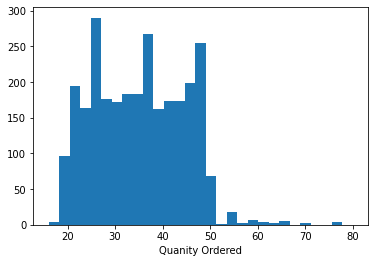

In [18]:
plt.hist(data=df,x='quantity_ordered')
plt.xlabel("Quanity Ordered")
plt.show()
bin_s=np.linspace(16,80,30)
plt.hist(data=df,x='quantity_ordered',bins=bin_s)
plt.xlabel("Quanity Ordered")
plt.show()

>### Observation
>- The first graph shows clearly that there is a high proportion of orders between 20 and 50 placed by the customers 
>- Order quantity displays a multimodal distribution with peak around 27,37, and 47 respectively. This strongly suggests that customers have differents needs and they make others based on their needs

## How are the following features distributed: names,status,product_line, deal_size

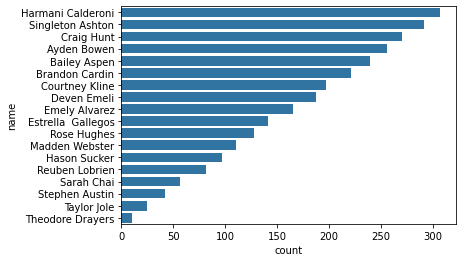

In [19]:
b_color=sns.color_palette()[0]
sns.countplot(data=df,y='name',color=b_color,order=df.name.value_counts().index)
plt.show()

>- Harmani Calderoni was able to pull about 300 (10.9%) customers within the period given in the data
>- Theodore Drayers Pulled the least number of customers, 10 (0.4%)
>- However, this visualization does not indicate which sales rep generated the most or the least revenue through out the period given in the data

## What is the distribution of sales' status categories?

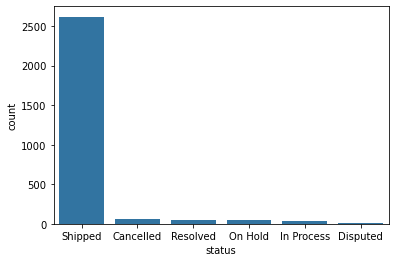

In [20]:
sns.countplot(data=df,x='status',color=b_color,order=df.status.value_counts().index);

>-  more than 2500 orders (92.7%) were shipped
>-  About 2.1% orders couldn't be resolved, they were cancelled
>-  Minimal disputed orders (0.5%)

## What is deal size distributed?

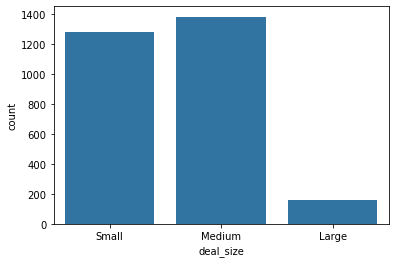

In [21]:
deal_size=['Small','Medium','Large'] 
order_sizes = pd.api.types.CategoricalDtype(ordered=True, categories=deal_size)
df['deal_size']=df['deal_size'].astype(order_sizes)
sns.countplot(data=df,x='deal_size',color=b_color);

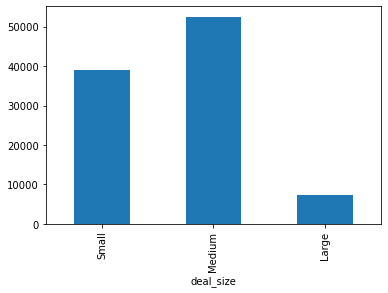

In [22]:
df.groupby(['deal_size'])['quantity_ordered'].sum().plot(kind='bar');

>### Observation
>-  Three unique deal sizes were represented in the data. Similar trends are noticeable considering the frenquency of orders and the sum of all others by deal sizes throughout the period.
>-  Customers seem to enjoy the Medium size the most and then the small deal size. However, they have low affection for Large deal sizes


## How are the product line distributed?

<AxesSubplot:xlabel='count', ylabel='product_line'>

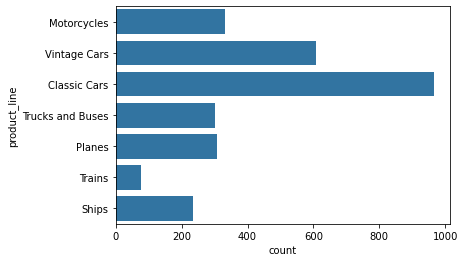

In [23]:
vt=['Motorcycles','Vintage Cars','Classic Cars','Trucks and Buses','Planes','Trains','Ships']
vt_order = pd.api.types.CategoricalDtype(ordered=True, categories=vt)
df['product_line']=df.product_line.astype(vt_order)
sns.countplot(data=df, y='product_line',color=b_color)

>### Observation
>- Classic cars is the highest (34.2%) sold product per transaction
>- Trains are the least sold per transaction

## How many active Customers are available?

In [24]:
df.customer_name.nunique()

92

## How frequent do customers make orders: who are the to top and least frequent customers?

In [25]:
# top 10 customers according to number of transactions made
pd.DataFrame(df.customer_name.value_counts()).head(10)

,customer_name
Euro Shopping Channel,259
Mini Gifts Distributors Ltd.,180
"Australian Collectors, Co.",55
La Rochelle Gifts,53
"AV Stores, Co.",51
Land of Toys Inc.,49
Muscle Machine Inc,48
Rovelli Gifts,48
"Anna's Decorations, Ltd",46
Souveniers And Things Co.,46


In [26]:
# leat 10 customers according to number of transactions made
pd.DataFrame(df.customer_name.value_counts()).tail(10)

,customer_name
"Men 'R' US Retailers, Ltd.",14
CAF Imports,13
West Coast Collectables Co.,13
"Double Decker Gift Stores, Ltd",12
Cambridge Collectables Co.,11
Microscale Inc.,10
Royale Belge,8
Auto-Moto Classics Inc.,8
Atelier graphique,7
Boards & Toys Co.,3


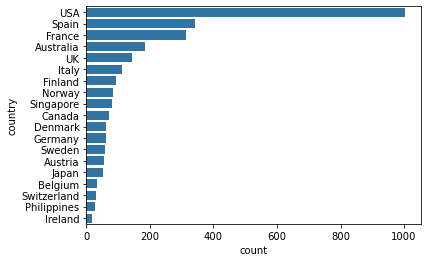

In [27]:
sns.countplot(data=df,y='country',color=b_color,order=df.country.value_counts().index);

last sale data collection happend in 0    December
Name: max_date, dtype: object,2005


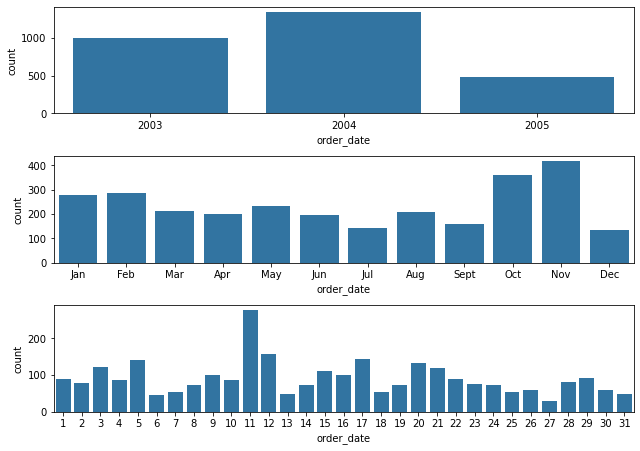

In [28]:
# Store the listing date breakdowns and their plotting indices in a dictionary
sale_breakdown = {
    'sale_years' : [1, df.order_date.dt.year],
    'sale_months' : [2, df.order_date.dt.month],
    'sale_days' : [3, df.order_date.dt.day],
}

# Plot the required information using a for loop
fig = plt.figure(figsize=(9, 8))

for key, value in sale_breakdown.items():
    plt.subplot(4, 1, value[0])
    sns.countplot(x= value[1], color = b_color)
    # Replace the month's integer values (0 - 12) with descriptive strings
    if (key == 'sale_months'):
        plt.xticks(np.arange(12), 
                   ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.tight_layout();

x=pd.DataFrame([df.order_date.max(),])
x.columns=['max_date']
x.max_date=pd.to_datetime(x.max_date)
print('last sale data collection happend in {},2005'.format(x.max_date.dt.month_name()))

>-  Although there was a gradual increase in sales transctions between 2003 and 2004, it decline 2005
>-  Sales transaction mostly occure in Novembr
>-  Saless transactions vary everyday of the month. However, Day 11 seem to accomodate many sales transactions compared to other days

## (II) Bivariate Exploratory Analysis <a id="bi"></a>

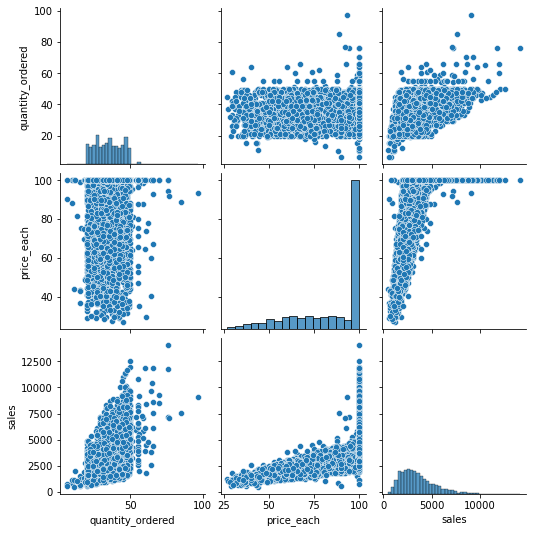

In [29]:
sns.pairplot(df);

>- As expected, there is a positive relation between sales and profit. 

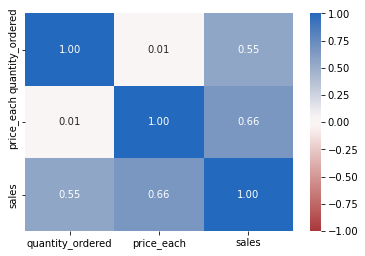

In [30]:

sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='vlag_r', vmin=-1, vmax = 1);

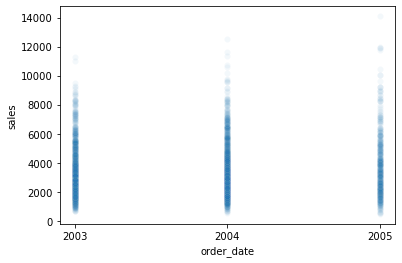

In [31]:
sns.scatterplot(x=df.order_date.dt.year,y=df['sales'],x_jitter=0.4, alpha=1/20);
plt.xticks(ticks=[2003,2004,2005],labels=['2003','2004','2005']);

>- The intensity of the data shows that there was a significant in sales between 2003- 2004. However It dropped drastically in 2005

## Explore relationship between concerned numeric variable with qualitative variable

In [32]:
df_c=df.set_index('order_date')
m_order=df_c.quantity_ordered.resample('1m').mean()

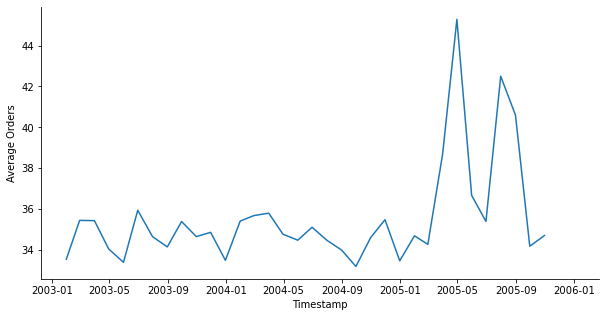

In [33]:
plt.figure(figsize=(10,5))
plt.plot(m_order.index,m_order.values)
sns.despine()
plt.xlabel('Timestamp')
plt.ylabel('Average Orders')
plt.show()

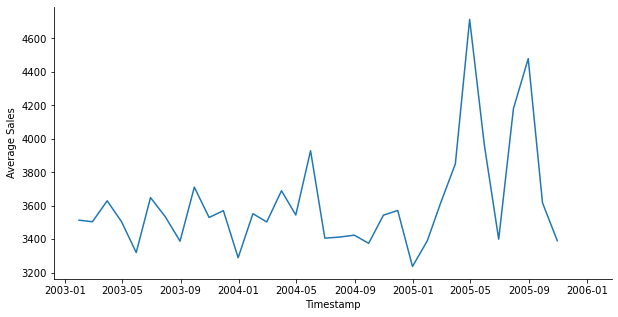

In [34]:
sales=df_c.sales.resample('1m').mean()
plt.figure(figsize=(10,5))
plt.plot(sales.index,sales.values)
sns.despine()
plt.xlabel('Timestamp')
plt.ylabel('Average Sales')
plt.show()

## How is the distribution of the total sales and total profit year-by-year like?

   year      product_line       sales
0  2003       Motorcycles   370895.58
1  2003      Vintage Cars   650987.76
2  2003      Classic Cars  1484785.29
3  2003  Trucks and Buses   420429.93
4  2003            Planes   272257.60 



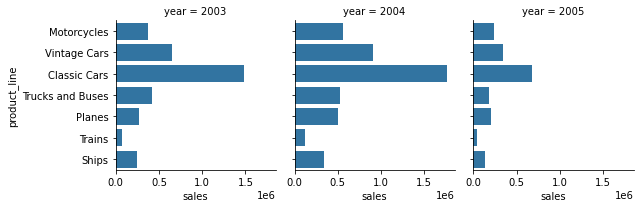

In [35]:
df['year']=df.order_date.dt.year
df2=df.groupby(['year','product_line'],as_index=False)[['sales']].sum()
print(df2.head(),'\n')
df2['product_line']=df2['product_line'].astype(vt_order)
g=sns.FacetGrid(data=df2,col='year',col_wrap=3,)
g.map(sns.barplot,'sales','product_line',order=None,hue_order=None);
plt.show()


>### Observation
>- it can be observed clearly that Classic cars are the most sale products. 
>- Generally, Heavier products generate the least sale and profit

## Is there any relationship between the numeric variables and non-numeric variables

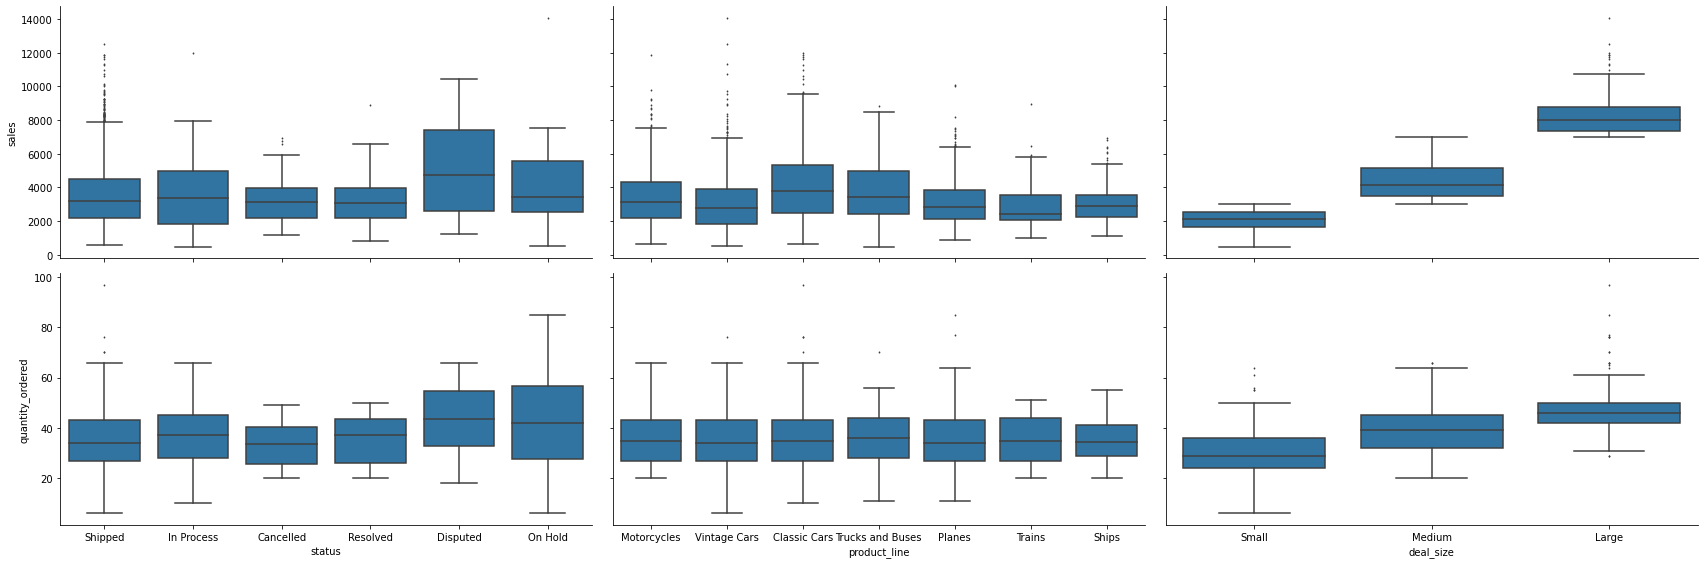

In [36]:
x_vals=['sales','quantity_ordered',]
y_vals=['status','product_line','deal_size']
g=sns.PairGrid(data=df,y_vars=x_vals,x_vars=y_vals,height = 4, aspect=2,)
g.map(sns.boxplot, fliersize=1,color=b_color)

plt.show()


>### Observation
>- The median sales  and quantity ordered for disputed sales is about 4000 dollars and 42 respectively. This implies that there is a huge sales potential locked up in disputed status.
>- Light-weight products appear to generate more sales than heavier products like planes, Trains and ships. This also makes a lot of sense since variation in customers' demand plays a vital role.
>- Although the distribution of ordered quantity within the product line slightly vary from one another, Classic cars seem to win the heart of many customers.The rate at which it is being demanded could be a huge factor in addition to the the quantity demanded.
>- Generally, ordered quantity, sales and profit increase with increase in deal size. Small deal have lesser economic bennefit compared to medium sized deals. The same goes with medium and Large. Large size have the largest profit share.


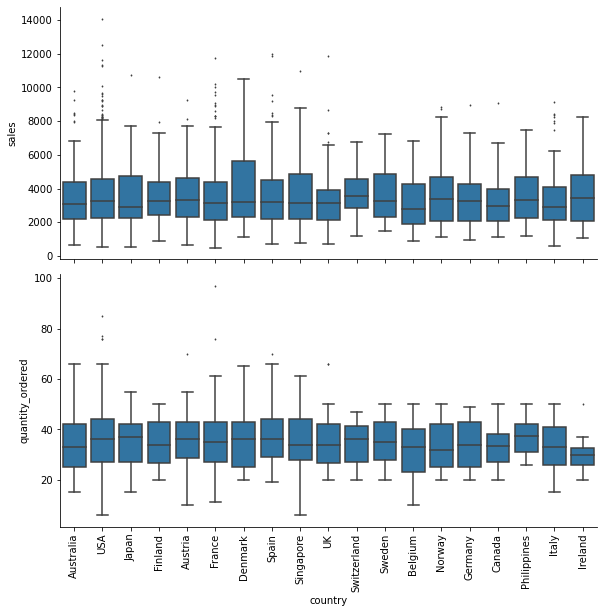

In [37]:
x_vals=['sales','quantity_ordered']
y_vals=['country']
g=sns.PairGrid(data=df,y_vars=x_vals,x_vars=y_vals,height = 4, aspect=2.1,)
g.map(sns.boxplot, fliersize=1,color=b_color)
plt.xticks(rotation=90)

plt.show()

>- Sales performance is some countries 

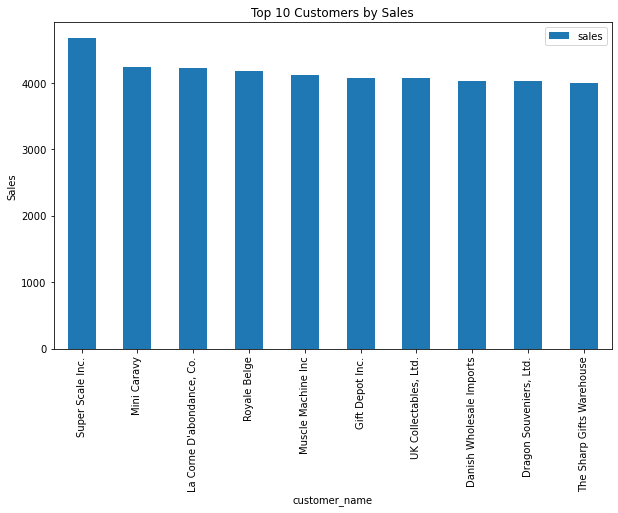

In [38]:
df.groupby('customer_name')[['sales']].mean().sort_values(by='sales',ascending=False).head(10).plot(kind='bar',stacked=True,figsize=[10,6],ylabel='Sales',title='Top 10 Customers by Sales');

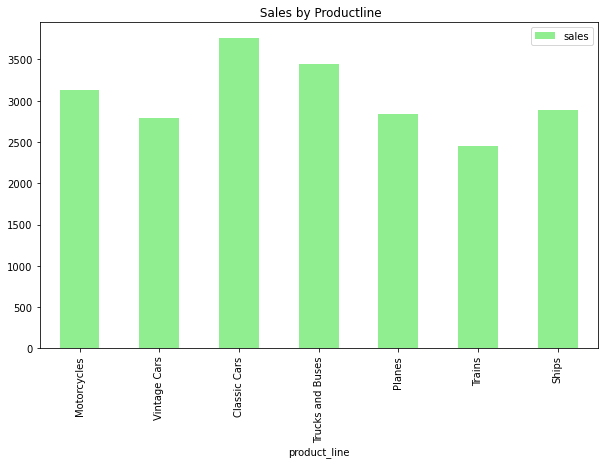

In [39]:

df.pivot_table( index=['product_line'],values=['sales'], aggfunc='median',).plot(kind='bar',stacked=True,color=['lightgreen','grey'],figsize=[10,6],title=" Sales by Productline");

plt.show()

>### Observation
>- Sales decrease considerably as the size of the product increases. This makes a lot of sense since individuals rarely purchase Planes, Trains and ships unless a small fraction of wealthy individuals, cooperate enterprise or government


## The 2014 sales Boom: which sales rep have the highest total sales record and is profitable?

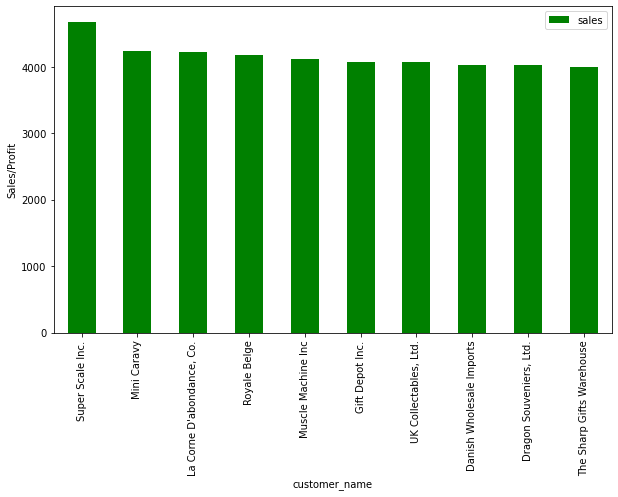

In [40]:
df.groupby('customer_name')[['sales']].mean().sort_values(by='sales',ascending=False).head(10).plot(kind='bar',stacked=True,color=['green','grey'],figsize=[10,6],ylabel='Sales/Profit');

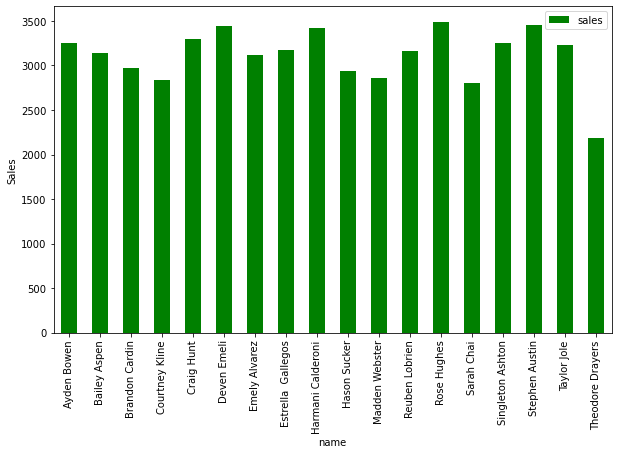

In [41]:
low=df['order_date']>'2003-12-31'
high=df['order_date']<'2005-12-31'

nm=df['name']=='Craig Hunt'
df.groupby('name')[['sales']].median().plot(kind='bar',stacked=True,ylabel='Sales',figsize=[10,6],color=['green','grey']);

## (III) Multivariate visualization <a id="mul"></a>

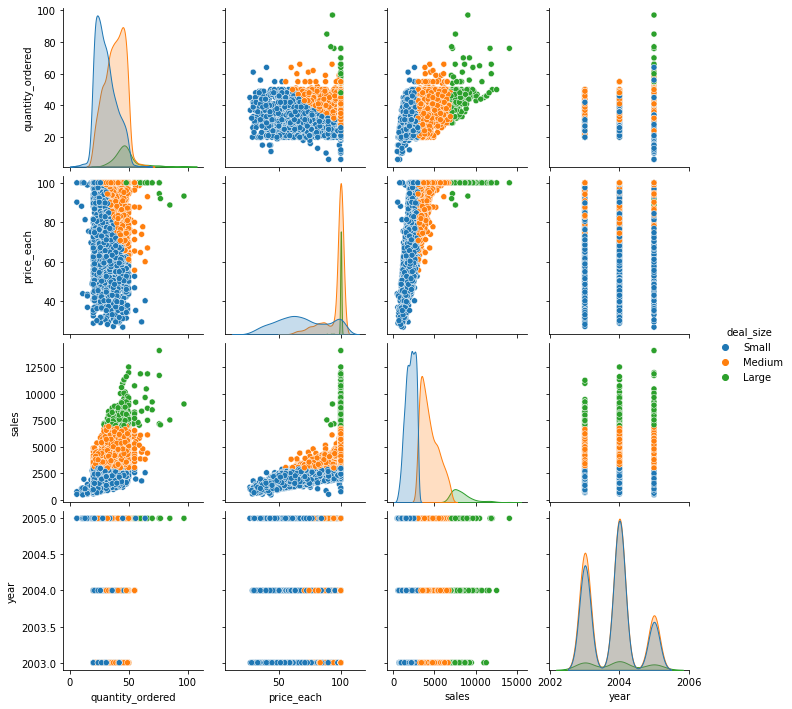

In [42]:
sns.pairplot(df,hue='deal_size');

## Is there is significant difference in the sizes of sales' deals per different?

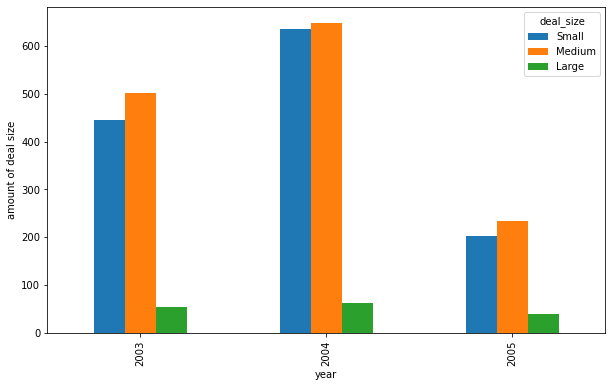

In [43]:
pd.crosstab(df.year,df.deal_size).plot(kind='bar',figsize=[10,6],ylabel='amount of deal size');


## Does deal size vary across the product line per year?

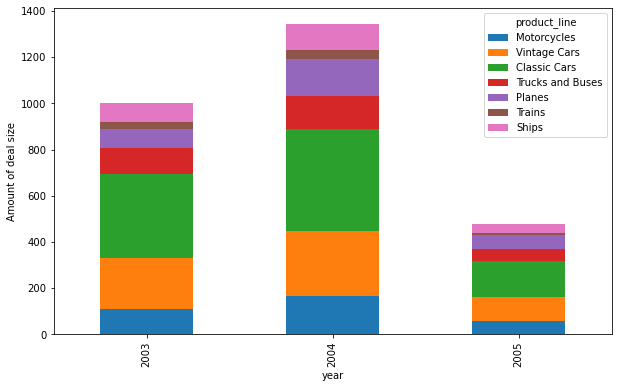

In [44]:
pd.crosstab(df.year,df.product_line).plot(kind='bar',stacked=True,figsize=[10,6],ylabel='Amount of deal size');

>## Observation
>- The proportion of heavy-weight products contribted much more to 2014 sales
>- The sales proportion was generally low in 2005. The year witnessed low purchase of heavy-weight products (Planes were not sold at all)

>### Observation
>- Craig Hunt, Hamani Caldeoni and Singleton Austin contributed significantly to the 2014 sales boom. Craig Hunt tops as having the highest sales and profit records (about 0.68M  and 0.6K dollars respectively).

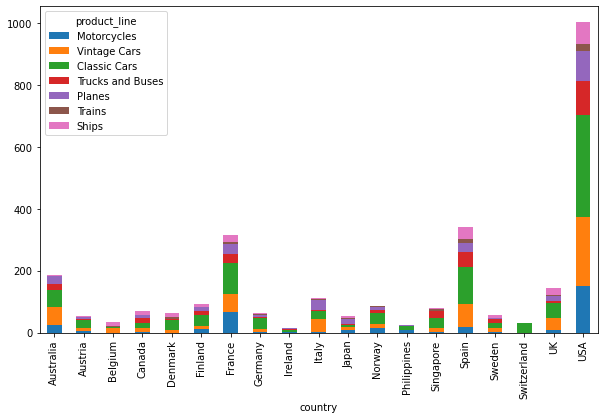

In [45]:
pd.crosstab(df.country,df.product_line).plot(kind='bar',stacked=True,figsize=(10,6));

## Conclusion <a id="con"></a>
***
- Although there is a surge in sales growth between 2003-2004, it drops drastically in 2005. 
- A strong positive correlation  is seen between sales and ordered_quantity which remains largely corellated (strongly positive) within the deal_size category. In other words, Medumium-sized pruchased products generate more sales than the small-size deals. However, the rate at which customers engage in small and Medium deals overwhemingly surpass large deal sizes.
- There is an inverse relationship betweeen the weight of products and sales. In other words lighter products such as Mortocycles and classic cars are more revenue than heavier weight products like Trains and Ships.This strongly due to the frequency of purchases by the customers as ligher-weight products are usually in high demand. This buttress the point that individuals rarely purchase Planes, Trains and ships unless a small fraction of wealthy individuals, cooperate enterprise or government.
- The USA market dominates. it customers'base doubled that of Spain and France combined within the period given in the data

## Limitations <a id="lim"></a>
***
>- The individual prices of each product does not reflect real market price. For example, the price of a Ship cannot be 74.45 dollars. Neither can the price of Motorcycles be 100 dollars
>- The reason for the sudden drop in 2005 sales cannot be ascertained given the limitation of the data. Gathering additional relevant data will be necessary 